<a href="https://colab.research.google.com/github/ilEnzio/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/ERLE_GRANGERII_DS18_LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
last_week_sales = np.array([3505, 2400, 3027, 2798, 3700, 3250, 2689])

In [4]:
last_week_sales.shape

(7,)

In [6]:
def get_mean(array):
  return sum(array)/len(array)

In [7]:
print(get_mean(last_week_sales))

3052.714285714286


In [8]:
# check the answer
last_week_sales.mean()

3052.714285714286

In [114]:
def get_sample_variance(array):
  x_bar = array.mean()
  diff_sum= []
  for i in array:
    diff_sum.append((i - x_bar)**2)
  
  numerator = sum(diff_sum)
  denominator = len(array)-1
  return numerator/denominator

In [115]:
get_sample_variance(last_week_sales)

214387.90476190473

In [116]:
# check
np.var(last_week_sales, ddof=1)

214387.90476190473

In [100]:
def get_sample_std(array):
  #
  a_mean = array.mean()
  diff_sum= []
  for i in array:
    diff_sum.append((i - a_mean)**2)
  std = (sum(diff_sum)/(len(array)-1))**.5
  return std

In [101]:
get_sample_std(last_week_sales)

463.0204150595357

In [112]:
#check result
last_week_sales.std()

428.67360686714756

In [111]:
shop_df["sales"].std()

463.0204150595357

In [ ]:
last_week

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [43]:
num_customer_last_week = np.array([127, 80,105, 92, 120, 115, 93 ])
num_customer_last_week

array([127,  80, 105,  92, 120, 115,  93])

In [49]:
# create a df with the two arrays as features: sales, number of customers
shop_df = pd.DataFrame({"sales" : last_week_sales, "num_of_customer": num_customer_last_week})
shop_df

sales  num_of_customer
0   3505              127
1   2400               80
2   3027              105
3   2798               92
4   3700              120
5   3250              115
6   2689               93

In [51]:
shop_df.cov()
#the main diagonal will be variance, the other values will be covariance

sales  num_of_customer
sales            214387.904762      7604.357143
num_of_customer    7604.357143       290.952381

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [102]:
#get the std of num_of customer
cust_std= get_sample_std(shop_df["num_of_customer"])
cust_std

17.057326313123664

In [99]:
shop_df['num_of_customer'].std()

17.057326313123664

In [106]:
# std of sales
sales_std= get_sample_std(shop_df["sales"])
sales_std

463.0204150595357

In [107]:
# I think this is the covariance
covar= shop_df.cov().iloc[0,1]

In [105]:
# so this should be the corr coefficient
#
covar/(cust_std*sales_std)

0.9628339778148909

In [64]:
# the correlation coefficient is one way to standardize the spread
# r = cov(X,Y)/X.std*Y.std

def get_corr_coef(df):
  std_X, std_Y = get_sample_std(shop_df["num_of_customer"]), get_sample_std(shop_df["sales"])
  
  return shop_df.cov().iloc[0,1]/(std_X*std_Y)


In [117]:
get_corr_coef(shop_df)

0.9628339778148909

In [68]:
# check with pandas - shop_df.corr()

sales  num_of_customer
sales            1.000000         0.962834
num_of_customer  0.962834         1.000000

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [118]:
titanic_df = pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv")
titanic_df.head()

Unnamed: 0  pclass  ...                        home.dest has_cabin_number
0           1     1.0  ...                     St Louis, MO                1
1           2     1.0  ...  Montreal, PQ / Chesterville, ON                1
2           3     1.0  ...  Montreal, PQ / Chesterville, ON                1
3           4     1.0  ...  Montreal, PQ / Chesterville, ON                1
4           5     1.0  ...  Montreal, PQ / Chesterville, ON                1

[5 rows x 16 columns]

In [119]:
titanic_df.shape

(1310, 16)

In [120]:
titanic_df.tail()

Unnamed: 0  pclass  survived  ...   body home.dest  has_cabin_number
1305        1306     3.0       0.0  ...    NaN       NaN                 0
1306        1307     3.0       0.0  ...  304.0       NaN                 0
1307        1308     3.0       0.0  ...    NaN       NaN                 0
1308        1309     3.0       0.0  ...    NaN       NaN                 0
1309        1310     NaN       NaN  ...    NaN       NaN                 0

[5 rows x 16 columns]

In [121]:
titanic_df.describe()

Unnamed: 0       pclass  ...        body  has_cabin_number
count  1310.000000  1309.000000  ...  121.000000       1310.000000
mean    655.500000     2.294882  ...  160.809917          0.225191
std     378.308736     0.837836  ...   97.696922          0.417867
min       1.000000     1.000000  ...    1.000000          0.000000
25%     328.250000     2.000000  ...   72.000000          0.000000
50%     655.500000     3.000000  ...  155.000000          0.000000
75%     982.750000     3.000000  ...  256.000000          0.000000
max    1310.000000     3.000000  ...  328.000000          1.000000

[8 rows x 9 columns]

In [151]:
titanic_df2 = titanic_df.drop(columns=["Unnamed: 0"])


In [152]:
titanic_df2.head()


pclass  survived  ...                        home.dest has_cabin_number
0     1.0       1.0  ...                     St Louis, MO                1
1     1.0       1.0  ...  Montreal, PQ / Chesterville, ON                1
2     1.0       0.0  ...  Montreal, PQ / Chesterville, ON                1
3     1.0       0.0  ...  Montreal, PQ / Chesterville, ON                1
4     1.0       0.0  ...  Montreal, PQ / Chesterville, ON                1

[5 rows x 15 columns]

In [153]:
titanic_df2.shape

(1310, 15)

In [157]:
titanic_df2["pclass"].value_counts()

3.0    709
1.0    323
2.0    277
Name: pclass, dtype: int64

In [158]:
# this is categorical, I think survived is as well.
titanic_df2["survived"].value_counts()

0.0    809
1.0    500
Name: survived, dtype: int64

In [ ]:
val_c = [titanic_df2[x].value_counts for x in titanic_df2]
print(val_c)

In [170]:
titanic_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   pclass            1309 non-null   float64
 1   survived          1309 non-null   float64
 2   name              1309 non-null   object 
 3   sex               1309 non-null   object 
 4   age               1310 non-null   float64
 5   sibsp             1309 non-null   float64
 6   parch             1309 non-null   float64
 7   ticket            1309 non-null   object 
 8   fare              1308 non-null   float64
 9   cabin             295 non-null    object 
 10  embarked          1310 non-null   object 
 11  boat              486 non-null    object 
 12  body              121 non-null    float64
 13  home.dest         745 non-null    object 
 14  has_cabin_number  1310 non-null   int64  
dtypes: float64(7), int64(1), object(7)
memory usage: 153.6+ KB


In [155]:
titanic_df2.describe()

pclass     survived  ...        body  has_cabin_number
count  1309.000000  1309.000000  ...  121.000000       1310.000000
mean      2.294882     0.381971  ...  160.809917          0.225191
std       0.837836     0.486055  ...   97.696922          0.417867
min       1.000000     0.000000  ...    1.000000          0.000000
25%       2.000000     0.000000  ...   72.000000          0.000000
50%       3.000000     0.000000  ...  155.000000          0.000000
75%       3.000000     1.000000  ...  256.000000          0.000000
max       3.000000     1.000000  ...  328.000000          1.000000

[8 rows x 8 columns]

In [156]:
# this will give us the covariance matrix... lets see what it does with the 
# categorec
titanic_df2.cov()

pclass  survived  ...         body  has_cabin_number
pclass             0.701969 -0.127248  ...    -2.876653         -0.249992
survived          -0.127248  0.236250  ...     0.000000          0.061406
age               -3.954605 -0.314343  ...    81.622922          1.463138
sibsp              0.053090 -0.014088  ...    -8.708471         -0.003946
parch              0.013287  0.034776  ...     4.237190          0.013316
fare             -24.227788  6.146023  ...  -179.164684         10.976961
body              -2.876653  0.000000  ...  9544.688567          3.625689
has_cabin_number  -0.249992  0.061406  ...     3.625689          0.174613

[8 rows x 8 columns]

In [171]:
titanic_df2.corr()

pclass  survived  ...      body  has_cabin_number
pclass            1.000000 -0.312469  ... -0.034642         -0.713857
survived         -0.312469  1.000000  ...       NaN          0.302250
age              -0.366370 -0.050199  ...  0.059059          0.271887
sibsp             0.060832 -0.027825  ... -0.099961         -0.009064
parch             0.018322  0.082660  ...  0.051099          0.036806
fare             -0.558629  0.244265  ... -0.043110          0.507253
body             -0.034642       NaN  ...  1.000000          0.083796
has_cabin_number -0.713857  0.302250  ...  0.083796          1.000000

[8 rows x 8 columns]

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [ ]:
# Orthogonal means that they form a right angle.  Geometric. 
# Algebraically if their dot product is 0 then they are orthogonal.



## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

Your text here

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

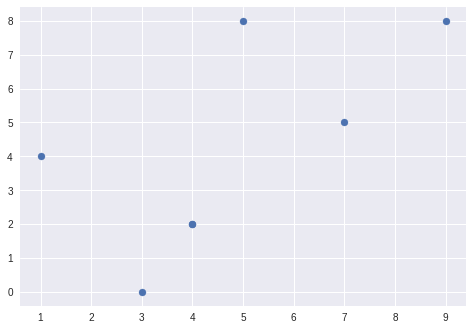

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()